In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Data loading:

In [3]:
data = pd.read_csv('uber.csv', low_memory=False, index_col=0)

In [4]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Data Preprocessing:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## IQR
$$IQR = Q_3 - Q_1$$
$$Min = Q_1 - 1.5 \times IQR$$
$$Max = Q_3 + 1.5 \times IQR$$

In [8]:
Q1 = data['pickup_longitude'].quantile(0.25)
Q3 = data['pickup_longitude'].quantile(0.75)
IQR = Q3 - Q1

Min = Q1 - 1.5 * IQR
Max = Q3 + 1.5 * IQR

In [9]:
data[(data['pickup_longitude']<Min) | (data['pickup_longitude']>Max)].shape[0]/data.shape[0]

0.06779533897669489

## Z score:

$$Z = |\frac{x - \mu}{\sigma}|$$

if Z > 3 then data is an outlier

In [10]:
mu = data['pickup_longitude'].mean()
std = data['pickup_longitude'].std()

Z = np.abs((data['pickup_longitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

1.9680098400492003


In [11]:
mu = data['pickup_latitude'].mean()
std = data['pickup_latitude'].std()

Z = np.abs((data['pickup_latitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

0.005100401401590305


In [12]:
mu = data['dropoff_latitude'].mean()
std = data['dropoff_latitude'].std()

Z = np.abs((data['dropoff_latitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

0.09028170953772705


In [13]:
mu = data['dropoff_longitude'].mean()
std = data['dropoff_longitude'].std()

Z = np.abs((data['dropoff_longitude'] - mu)/std)

print(data[Z>3].shape[0]/data.shape[0]*100)

data = data[Z<=3]

0.010210541362903062


In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195856.000000,195856.000000,195856.000000,195856.000000,195856.000000,195856.000000
mean,11.341849,-73.975161,40.750900,-73.974158,40.751159,1.684814
std,9.798578,0.060226,0.032562,0.042953,0.037221,1.387649
min,-52.000000,-89.933333,39.514527,-75.458979,37.533090,0.000000
25%,6.000000,-73.992274,40.736447,-73.991597,40.735323,1.000000
50%,8.500000,-73.982108,40.753307,-73.980536,40.753747,1.000000
75%,12.500000,-73.968355,40.767550,-73.965373,40.768335,2.000000
max,499.000000,-67.370360,42.478467,-69.046738,42.464187,208.000000


# Feature extraction:

## [GeoPy](https://geopy.readthedocs.io/en/stable/)

In [16]:
! pip install geopy

In [17]:
from geopy.distance import geodesic

In [18]:
Distance = []

for i in range(data.shape[0]):
    start = (data.loc[i, 'pickup_latitude'], data.loc[i, 'pickup_longitude'])
    dest = (data.loc[i, 'dropoff_latitude'], data.loc[i, 'dropoff_longitude'])
    Distance.append(geodesic(start, dest).kilometers)

In [19]:
df = pd.DataFrame({'distance': Distance,
                   'n_passenger': data['passenger_count'].values,
                   'fare': data['fare_amount'].values})

In [20]:
df

,distance,n_passenger,fare
0,1.681111,1,7.5
1,2.454363,1,7.7
2,5.039603,1,12.9
3,1.661442,3,5.3
4,4.483730,5,16.0
...,...,...,...
195851,0.112128,1,3.0
195852,1.879635,1,7.5
195853,12.867916,2,30.9
195854,3.536552,1,14.5


In [21]:
df.describe()

,distance,n_passenger,fare
count,195856.000000,195856.000000,195856.000000
mean,3.363642,1.684814,11.341849
std,5.476088,1.387649,9.798578
min,0.000000,0.000000,-52.000000
25%,1.256185,1.000000,6.000000
50%,2.157213,1.000000,8.500000
75%,3.907804,2.000000,12.500000
max,1343.523298,208.000000,499.000000


In [22]:
df = df[df['distance']!=0]
df = df[df['n_passenger']!=0]
df = df[df['n_passenger']<=6]
df = df[df['fare']>0]

df.reset_index(inplace=True, drop=True)

In [23]:
mu = df['fare'].mean()
std = df['fare'].std()

Z = np.abs((df['fare'] - mu)/std)

print(df[Z>3].shape[0]/df.shape[0]*100)

df = df[Z<=3]

2.713983149587543


In [24]:
mu = df['distance'].mean()
std = df['distance'].std()

Z = np.abs((df['distance'] - mu)/std)

print(df[Z>3].shape[0]/df.shape[0]*100)

df = df[Z<=3]

0.14424868259967


In [25]:
df.reset_index(inplace=True, drop=True)

<Axes: xlabel='distance', ylabel='fare'>

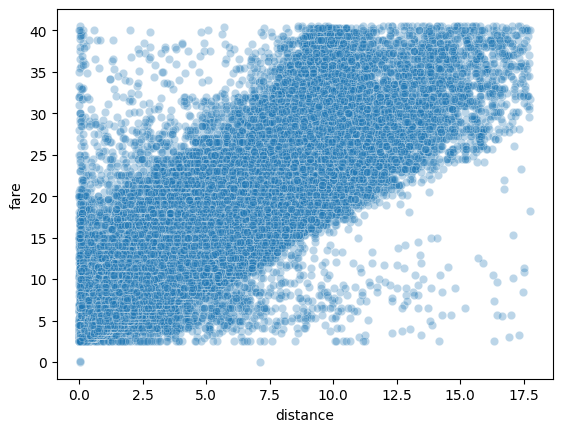

In [26]:
sns.scatterplot(x='distance', y='fare', data=df, alpha=0.3)

# Linear Model:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n,$$
$$\theta = (X^T X)^{-1} X^T Y$$

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = np.asarray(df[['distance', 'n_passenger']])
y = np.asarray(df['fare'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.35)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(121939, 2) (121939,)
(65660, 2) (65660,)


In [31]:
theta1 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [32]:
theta1

array([2.5959374, 0.9443508])

In [33]:
X_test @ theta1

array([ 9.0331603 ,  5.03203152,  6.98909893, ...,  7.02773925,
        7.02682856, 42.95410112])

In [34]:
xx = np.c_[np.ones((X_train.shape[0])), X_train]

In [35]:
theta2 = np.linalg.inv(xx.T @ xx) @ xx.T @ y_train

In [36]:
theta2

array([3.65776501, 2.18093143, 0.04144101])

In [37]:
np.c_[np.ones((X_test.shape[0])), X_test] @ theta2

array([10.49487795,  5.62952191,  8.77759552, ...,  8.8100585 ,
        8.80929341, 38.24102473])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr1 = LinearRegression()

lr1.fit(X_train, y_train)

LinearRegression()

In [40]:
lr1.coef_

array([2.18093143, 0.04144101])

In [41]:
lr1.intercept_

np.float64(3.6577650107561013)

In [42]:
theta2

array([3.65776501, 2.18093143, 0.04144101])

In [43]:
y_pred = lr1.predict(X_test)

In [44]:
y_pred

array([10.49487795,  5.62952191,  8.77759552, ...,  8.8100585 ,
        8.80929341, 38.24102473])

In [45]:
y_test

array([ 8.9,  6.1, 10.5, ...,  8.1,  8.9, 35. ])

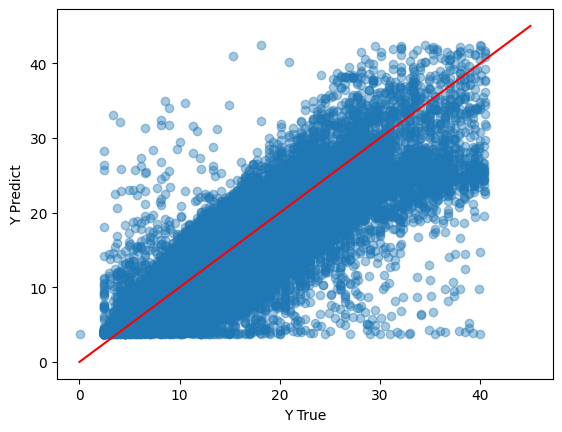

In [46]:
plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

In [47]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [48]:
lr2.coef_

array([2.5959374, 0.9443508])

In [49]:
y_pred = lr2.predict(X_test)

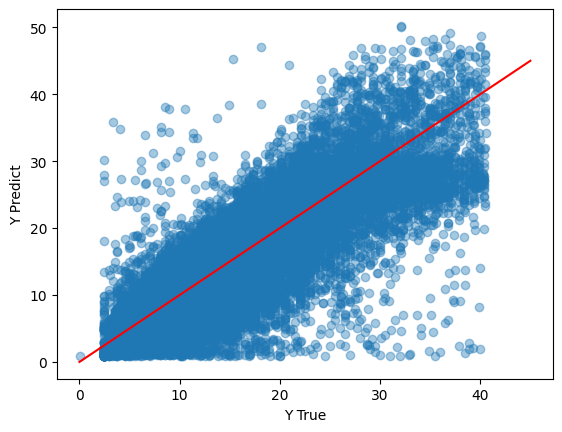

In [50]:
plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

## Polynomial Features

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(X_train)

In [53]:
lr_pf = LinearRegression(fit_intercept=False)
lr_pf.fit(X_train_pf, y_train)

LinearRegression(fit_intercept=False)

In [54]:
lr_pf.coef_

array([ 3.35092965,  2.42571185, -0.04499457, -0.02279012,  0.00377053,
        0.0125168 ])

In [55]:
lr_pf.intercept_

0.0

In [56]:
y_pred = lr_pf.predict(PolynomialFeatures(degree=2).fit_transform(X_test))

In [57]:
y_pred

array([10.66732348,  5.37660954,  8.85203214, ...,  8.88660991,
        8.88579509, 36.09979358])

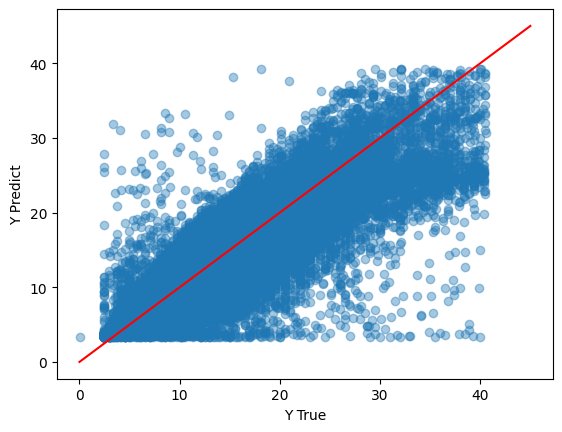

In [58]:
plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
steps = [('poly_feature', PolynomialFeatures(degree=15)),
         ('lr', LinearRegression(fit_intercept=False))]

model = Pipeline(steps=steps)

model.fit(X_train, y_train)

Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=15)),
                ('lr', LinearRegression(fit_intercept=False))])

In [61]:
model['lr'].coef_;

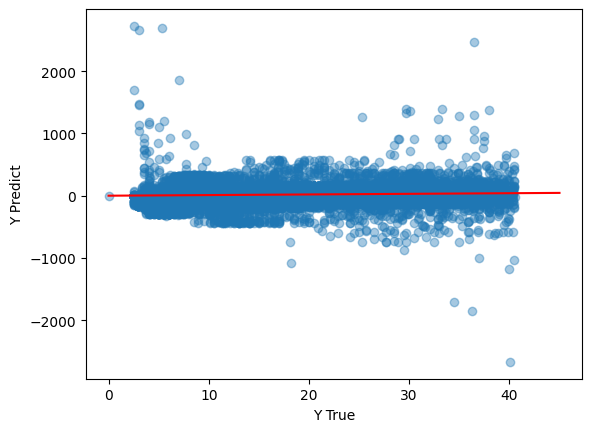

In [62]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

## Linear Ridge:
$$\min_{\theta} \| X\theta - y\|_2^2 + \alpha \|\theta\|^2_2$$

## Linear Lasso:
$$\min_{\theta} \frac{1}{n_{sample}}\| X\theta - y\|_2^2 + \alpha \|\theta\|_1$$

## Elastic-Net Model
$$\min_{\theta} \frac{1}{2 n_{Samples}} \|X\theta - y\|^2_2 + \alpha \rho\|\theta\|_1 + \frac{\alpha(1-\rho)}{2}\|\theta\|_2^2, ~~~~0\leq \rho \leq 1$$

In [63]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [64]:
steps = [('poly_feature', PolynomialFeatures(degree=5)),
         ('lr', LinearRegression(fit_intercept=False))]

lr = Pipeline(steps=steps)

lr.fit(X_train, y_train)

Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=5)),
                ('lr', LinearRegression(fit_intercept=False))])

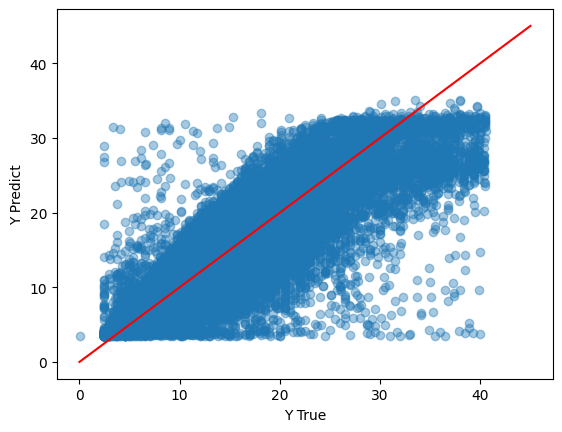

In [65]:
steps = [('poly_feature', PolynomialFeatures(degree=5)),
         ('lr', Ridge(alpha=100, fit_intercept=False))]

lr_ridge = Pipeline(steps=steps)

lr_ridge.fit(X_train, y_train)


y_pred = lr_ridge.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

In [66]:
lr_ridge['lr'].coef_

array([ 2.97628435e+00,  2.74772756e+00,  9.44760412e-01, -2.96479289e-01,
       -1.86613716e-01, -6.45373194e-01,  6.28628593e-02,  7.02608547e-03,
        8.42238852e-02,  2.62052653e-01, -4.80761679e-03, -3.86541437e-04,
        1.42143610e-03, -2.33589652e-02, -5.11228636e-02,  1.18094482e-04,
       -8.44802001e-05,  4.49813850e-04, -1.03773014e-03,  2.76995534e-03,
        3.55772793e-03])

c:\Users\MBAhmadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.842e+05, tolerance: 1.752e+03
  model = cd_fast.enet_coordinate_descent(


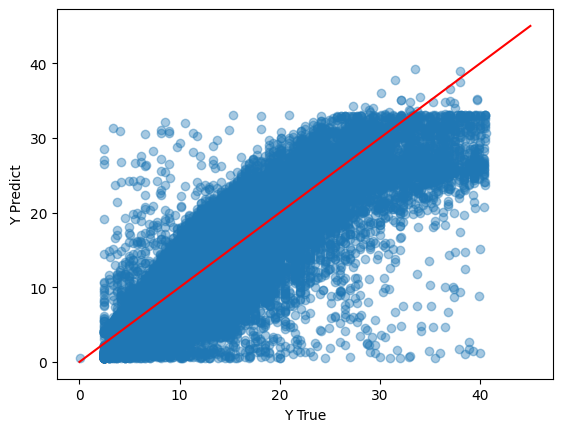

In [67]:
steps = [('poly_feature', PolynomialFeatures(degree=5)),
         ('lr', Lasso(alpha=1, fit_intercept=False))]

lr_lasso = Pipeline(steps=steps)

lr_lasso.fit(X_train, y_train)


y_pred = lr_lasso.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

In [68]:
lr_lasso['lr'].coef_

array([ 0.00000000e+00,  3.02248816e+00,  4.44049123e-01,  0.00000000e+00,
        0.00000000e+00,  9.45379735e-02, -4.74084363e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.09592871e-04, -2.79629508e-04,
       -2.38953227e-03, -7.40267350e-03, -1.04340193e-03, -1.92430715e-06,
       -2.42633702e-06,  2.58071267e-05,  9.26699622e-04,  7.03152233e-05,
       -9.77990806e-06])

c:\Users\MBAhmadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+06, tolerance: 1.752e+03
  model = cd_fast.enet_coordinate_descent(


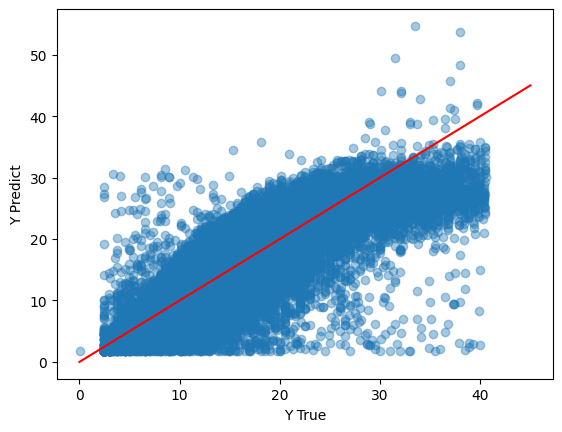

In [69]:
steps = [('poly_feature', PolynomialFeatures(degree=5)),
         ('lr', ElasticNet(alpha=1, l1_ratio=0.5, fit_intercept=False))]

lr_elastic = Pipeline(steps=steps)

lr_elastic.fit(X_train, y_train)


y_pred = lr_elastic.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4);
plt.plot(np.linspace(0, 45, 100), 
         np.linspace(0, 45, 100),
         c='red')

plt.xlabel('Y True')
plt.ylabel('Y Predict');

#  Metrics:

$$Max ERR = \max_i |y_i - \hat{y}_i|,$$

$$MAE = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} |y_i - \hat{y}_i|$$

$$MSE = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2$$

$$RMSE = \sqrt{\frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2}$$

$$R^2 = 1 - \frac{ \sum_{i=1}^{n_{sample}} (y_i - \hat{y}_i)^2}{ \sum_{i=1}^{n_{sample}} (y_i - \bar{y})^2}$$

In [70]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [71]:
print(max_error(y_true=y_test, y_pred=lr.predict(X_test)))
print(max_error(y_true=y_test, y_pred=lr_ridge.predict(X_test)))
print(max_error(y_true=y_test, y_pred=lr_lasso.predict(X_test)))
print(max_error(y_true=y_test, y_pred=lr_elastic.predict(X_test)))

36.29285010352795
36.31792716144611
38.744457657032065
37.27350335317087


In [72]:
print(mean_absolute_error(y_true=y_test, y_pred=lr.predict(X_test)))
print(mean_absolute_error(y_true=y_test, y_pred=lr_ridge.predict(X_test)))
print(mean_absolute_error(y_true=y_test, y_pred=lr_lasso.predict(X_test)))
print(mean_absolute_error(y_true=y_test, y_pred=lr_elastic.predict(X_test)))

1.9780590794888493
1.9773227978477141
2.3073700873408525
2.338698160152051


In [73]:
print(mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test)))
print(mean_squared_error(y_true=y_test, y_pred=lr_ridge.predict(X_test)))
print(mean_squared_error(y_true=y_test, y_pred=lr_lasso.predict(X_test)))
print(mean_squared_error(y_true=y_test, y_pred=lr_elastic.predict(X_test)))

9.108693521862516
9.110732060723429
11.2020903059316
11.474220841695569


In [74]:
print(root_mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test)))
print(root_mean_squared_error(y_true=y_test, y_pred=lr_ridge.predict(X_test)))
print(root_mean_squared_error(y_true=y_test, y_pred=lr_lasso.predict(X_test)))
print(root_mean_squared_error(y_true=y_test, y_pred=lr_elastic.predict(X_test)))

3.0180612190382283
3.0183989233902513
3.3469523907476786
3.387361929539796


In [75]:
print(r2_score(y_true=y_test, y_pred=lr.predict(X_test)))
print(r2_score(y_true=y_test, y_pred=lr_ridge.predict(X_test)))
print(r2_score(y_true=y_test, y_pred=lr_lasso.predict(X_test)))
print(r2_score(y_true=y_test, y_pred=lr_elastic.predict(X_test)))

0.7740538818576769
0.7740033147877452
0.7221260311778006
0.7153756845955734
